In [159]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# Finding whether older planes suffer more delays

In [160]:
# Import datasets
merged_data = pd.read_csv(r"C:\Documents\Python data set\merged.csv")

In [161]:
Plane_data = pd.read_csv(r"C:\Documents\Python data set\Plane_data.csv")

In [162]:
# Checking the dataset
merged_data.head(10)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2006,10,24,2,1900.0,1700,2111.0,1910,AA,2097,...,7,17,0,NaN,0,69,0,1,0,51
1,2006,11,19,7,1352.0,1351,1649.0,1726,UA,177,...,6,12,0,NaN,0,0,0,0,0,0
2,2006,4,28,5,1632.0,1635,1730.0,1743,OH,5260,...,5,10,0,NaN,0,0,0,0,0,0
3,2006,5,4,4,2006.0,1955,2115.0,2105,WN,1454,...,3,19,0,NaN,0,0,0,0,0,0
4,2006,12,21,4,744.0,730,901.0,826,AS,143,...,2,36,0,NaN,0,0,14,21,0,0
5,2006,12,12,2,905.0,905,1031.0,1047,OH,5319,...,9,10,0,NaN,0,0,0,0,0,0
6,2007,2,3,6,1815.0,1810,2037.0,2023,XE,3068,...,5,13,0,NaN,0,0,0,0,0,0
7,2007,1,9,2,1856.0,1900,2050.0,2059,9E,4793,...,15,10,0,NaN,0,0,0,0,0,0
8,2006,11,30,4,1212.0,1210,1217.0,1215,WN,1887,...,4,13,0,NaN,0,0,0,0,0,0
9,2006,6,24,6,1152.0,1046,1306.0,1159,OO,6207,...,6,10,0,NaN,0,0,0,67,0,0


In [163]:
Plane_data.shape

(4480, 9)

In [164]:
Plane_data.head(10)

,tailnum,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year
0,N10156,Corporation,EMBRAER,02/13/2004,EMB-145XR,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2004
1,N102UW,Corporation,AIRBUS INDUSTRIE,05/26/1999,A320-214,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1998
2,N10323,Corporation,BOEING,07/01/1997,737-3TO,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1986
3,N103US,Corporation,AIRBUS INDUSTRIE,06/18/1999,A320-214,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1999
4,N104UA,Corporation,BOEING,01/26/1998,747-422,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1998
5,N104UW,Corporation,AIRBUS INDUSTRIE,07/02/1999,A320-214,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1999
6,N10575,Corporation,EMBRAER,06/24/2003,EMB-145LR,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2002
7,N105UA,Corporation,BOEING,10/15/2007,747-451,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1994
8,N105UW,Corporation,AIRBUS INDUSTRIE,07/22/1999,A320-214,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1999
9,N106US,Corporation,AIRBUS INDUSTRIE,08/05/1999,A320-214,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1999


In [165]:
# Renaming the column year to manufactured year 
Plane_data = Plane_data.rename(columns = {'year' : 'Manufactured year'})

In [166]:
merged_data.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [167]:
Plane_data.columns

Index(['tailnum', 'type', 'manufacturer', 'issue_date', 'model', 'status',
       'aircraft_type', 'engine_type', 'Manufactured year'],
      dtype='object')

In [168]:
Plane_data.dtypes

tailnum              object
type                 object
manufacturer         object
issue_date           object
model                object
status               object
aircraft_type        object
engine_type          object
Manufactured year    object
dtype: object

In [169]:
merged_data.dtypes

Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn                 int64
TaxiOut                int64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay           int64
WeatherDelay           int64
NASDelay               int64
SecurityDelay          int64
LateAircraftDelay      int64
dtype: object

In [170]:
# Renaming the column of planedata tailnum to TailNum to merge both datasets
Plane_data = Plane_data.rename(columns = {'tailnum' : 'TailNum'})

In [171]:
Plane_data.columns

Index(['TailNum', 'type', 'manufacturer', 'issue_date', 'model', 'status',
       'aircraft_type', 'engine_type', 'Manufactured year'],
      dtype='object')

In [172]:
# merging the data set to get form a combined dataset keeping TailNum as primary key
combined_data = merged_data.merge(Plane_data, on=['TailNum'])

In [173]:
combined_data

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,SecurityDelay,LateAircraftDelay,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,Manufactured year
0,2006,11,19,7,1352.0,1351,1649.0,1726,UA,177,...,0,0,Corporation,BOEING,05/26/2004,757-222,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1992
1,2006,12,21,4,1817.0,1820,2059.0,2051,UA,1204,...,0,0,Corporation,BOEING,05/26/2004,757-222,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1992
2,2006,7,1,6,952.0,955,1342.0,1315,UA,787,...,0,0,Corporation,BOEING,05/26/2004,757-222,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1992
3,2006,1,1,7,1908.0,1910,2309.0,2225,UA,83,...,0,0,Corporation,BOEING,05/26/2004,757-222,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1992
4,2007,9,30,7,657.0,700,730.0,734,UA,347,...,0,0,Corporation,BOEING,05/26/2004,757-222,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1202855,2007,12,31,1,1535.0,1540,1655.0,1659,US,897,...,0,0,Corporation,EMBRAER,12/18/2007,ERJ 190-100 IGW,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2007
1202856,2007,12,30,7,1725.0,1730,2110.0,2059,US,1628,...,0,0,Corporation,EMBRAER,12/18/2007,ERJ 190-100 IGW,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2007
1202857,2006,10,14,6,1724.0,1700,1934.0,1923,UA,907,...,0,0,Corporation,BOEING,07/10/2007,747-422,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1997
1202858,2006,4,25,2,1421.0,1407,1959.0,2000,UA,114,...,0,0,Corporation,BOEING,07/10/2007,747-422,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1997


In [174]:
combined_data.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'type', 'manufacturer', 'issue_date', 'model', 'status',
       'aircraft_type', 'engine_type', 'Manufactured year'],
      dtype='object')

In [175]:
combined_data.shape

(1202860, 37)

In [176]:
# Replace non-numeric values like 'None' with NaN
combined_data['Manufactured year'] = pd.to_numeric(combined_data['Manufactured year'], errors='coerce')

In [177]:
# Drop rows with NaN values in the 'Manufactured year' column
combined_data = combined_data.dropna(subset=['Manufactured year'])

In [178]:
# Convert the 'Manufactured year' column to integers
combined_data.loc['Manufactured year'] = combined_data['Manufactured year'].astype(int)

C:\Users\Mohamed Shiham\AppData\Local\Temp\ipykernel_14688\1049223269.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_data.loc['Manufactured year'] = combined_data['Manufactured year'].astype(int)


In [179]:
# Adding a new column to calculate the age of the planes
combined_data['age'] = combined_data['Year'] - combined_data['Manufactured year']

C:\Users\Mohamed Shiham\AppData\Local\Temp\ipykernel_14688\748869657.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_data['age'] = combined_data['Year'] - combined_data['Manufactured year']


In [180]:
combined_data.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'type', 'manufacturer', 'issue_date', 'model', 'status',
       'aircraft_type', 'engine_type', 'Manufactured year', 'age'],
      dtype='object')

In [181]:
# Arranging the age with ascending order
combined_data['age'].value_counts().sort_index()

-1.0         194
 0.0       16865
 1.0       51111
 2.0       64853
 3.0       82818
 4.0       88294
 5.0       98483
 6.0       98274
 7.0       88330
 8.0       78347
 9.0       54068
 10.0      36932
 11.0      35605
 12.0      30747
 13.0      27488
 14.0      30092
 15.0      35744
 16.0      35743
 17.0      31916
 18.0      33059
 19.0      36848
 20.0      27518
 21.0      25216
 22.0      16740
 23.0       5209
 24.0       2957
 25.0        721
 26.0        959
 27.0       2464
 28.0       2780
 29.0       2070
 30.0       1903
 31.0       2530
 32.0       1467
 33.0        539
 34.0        467
 35.0        158
 36.0        453
 37.0       2222
 38.0       4885
 39.0       5254
 40.0       2040
 41.0        282
 42.0        269
 43.0        310
 44.0        300
 45.0        141
 47.0        252
 48.0        225
 49.0        103
 50.0         94
 51.0         25
 2006.0      443
 2007.0      606
Name: age, dtype: int64

In [182]:
# Removing unnecessary age values for easy calculation
combined_data = combined_data[combined_data['age'] != -1]

In [183]:
combined_data = combined_data[combined_data['age'] != 2006.0]

In [184]:
combined_data = combined_data[combined_data['age'] != 2007.0]

In [185]:
combined_data['age'].value_counts().sort_index()

0.0     16865
1.0     51111
2.0     64853
3.0     82818
4.0     88294
5.0     98483
6.0     98274
7.0     88330
8.0     78347
9.0     54068
10.0    36932
11.0    35605
12.0    30747
13.0    27488
14.0    30092
15.0    35744
16.0    35743
17.0    31916
18.0    33059
19.0    36848
20.0    27518
21.0    25216
22.0    16740
23.0     5209
24.0     2957
25.0      721
26.0      959
27.0     2464
28.0     2780
29.0     2070
30.0     1903
31.0     2530
32.0     1467
33.0      539
34.0      467
35.0      158
36.0      453
37.0     2222
38.0     4885
39.0     5254
40.0     2040
41.0      282
42.0      269
43.0      310
44.0      300
45.0      141
47.0      252
48.0      225
49.0      103
50.0       94
51.0       25
Name: age, dtype: int64

In [147]:
# age column grouped by ArrDelay and DepDelay with average 
delays = combined_data.groupby('age')[['ArrDelay','DepDelay']].mean()

In [148]:
# getting total delay of delays
Total_delay = delays[['ArrDelay','DepDelay']].sum(axis=1)

In [189]:
delays['Total_delay'] = Total_delay
Total_delay

age
0.0     21.441200
1.0     20.506199
2.0     20.481855
3.0     20.571245
4.0     22.154972
5.0     19.518061
6.0     18.483397
7.0     19.932892
8.0     20.884114
9.0     21.912089
10.0    22.014260
11.0    19.314951
12.0    20.478849
13.0    20.518996
14.0    19.314829
15.0    21.256533
16.0    21.923181
17.0    20.725590
18.0    21.369720
19.0    21.129799
20.0    22.461074
21.0    20.642324
22.0    20.066687
23.0    21.347252
24.0    23.531789
25.0    33.198336
26.0    20.096455
27.0    23.308780
28.0    19.920683
29.0    21.288084
30.0    21.883868
31.0    21.601252
32.0    20.303795
33.0    16.850649
34.0    18.900428
35.0    13.253165
36.0    13.904341
37.0    12.603435
38.0    17.205851
39.0    18.533435
40.0    26.286438
41.0    23.501773
42.0    28.620818
43.0    22.390323
44.0    23.766667
45.0    24.304965
47.0    25.174603
48.0    24.286667
49.0     4.029126
50.0    22.781915
51.0    30.880000
dtype: float64

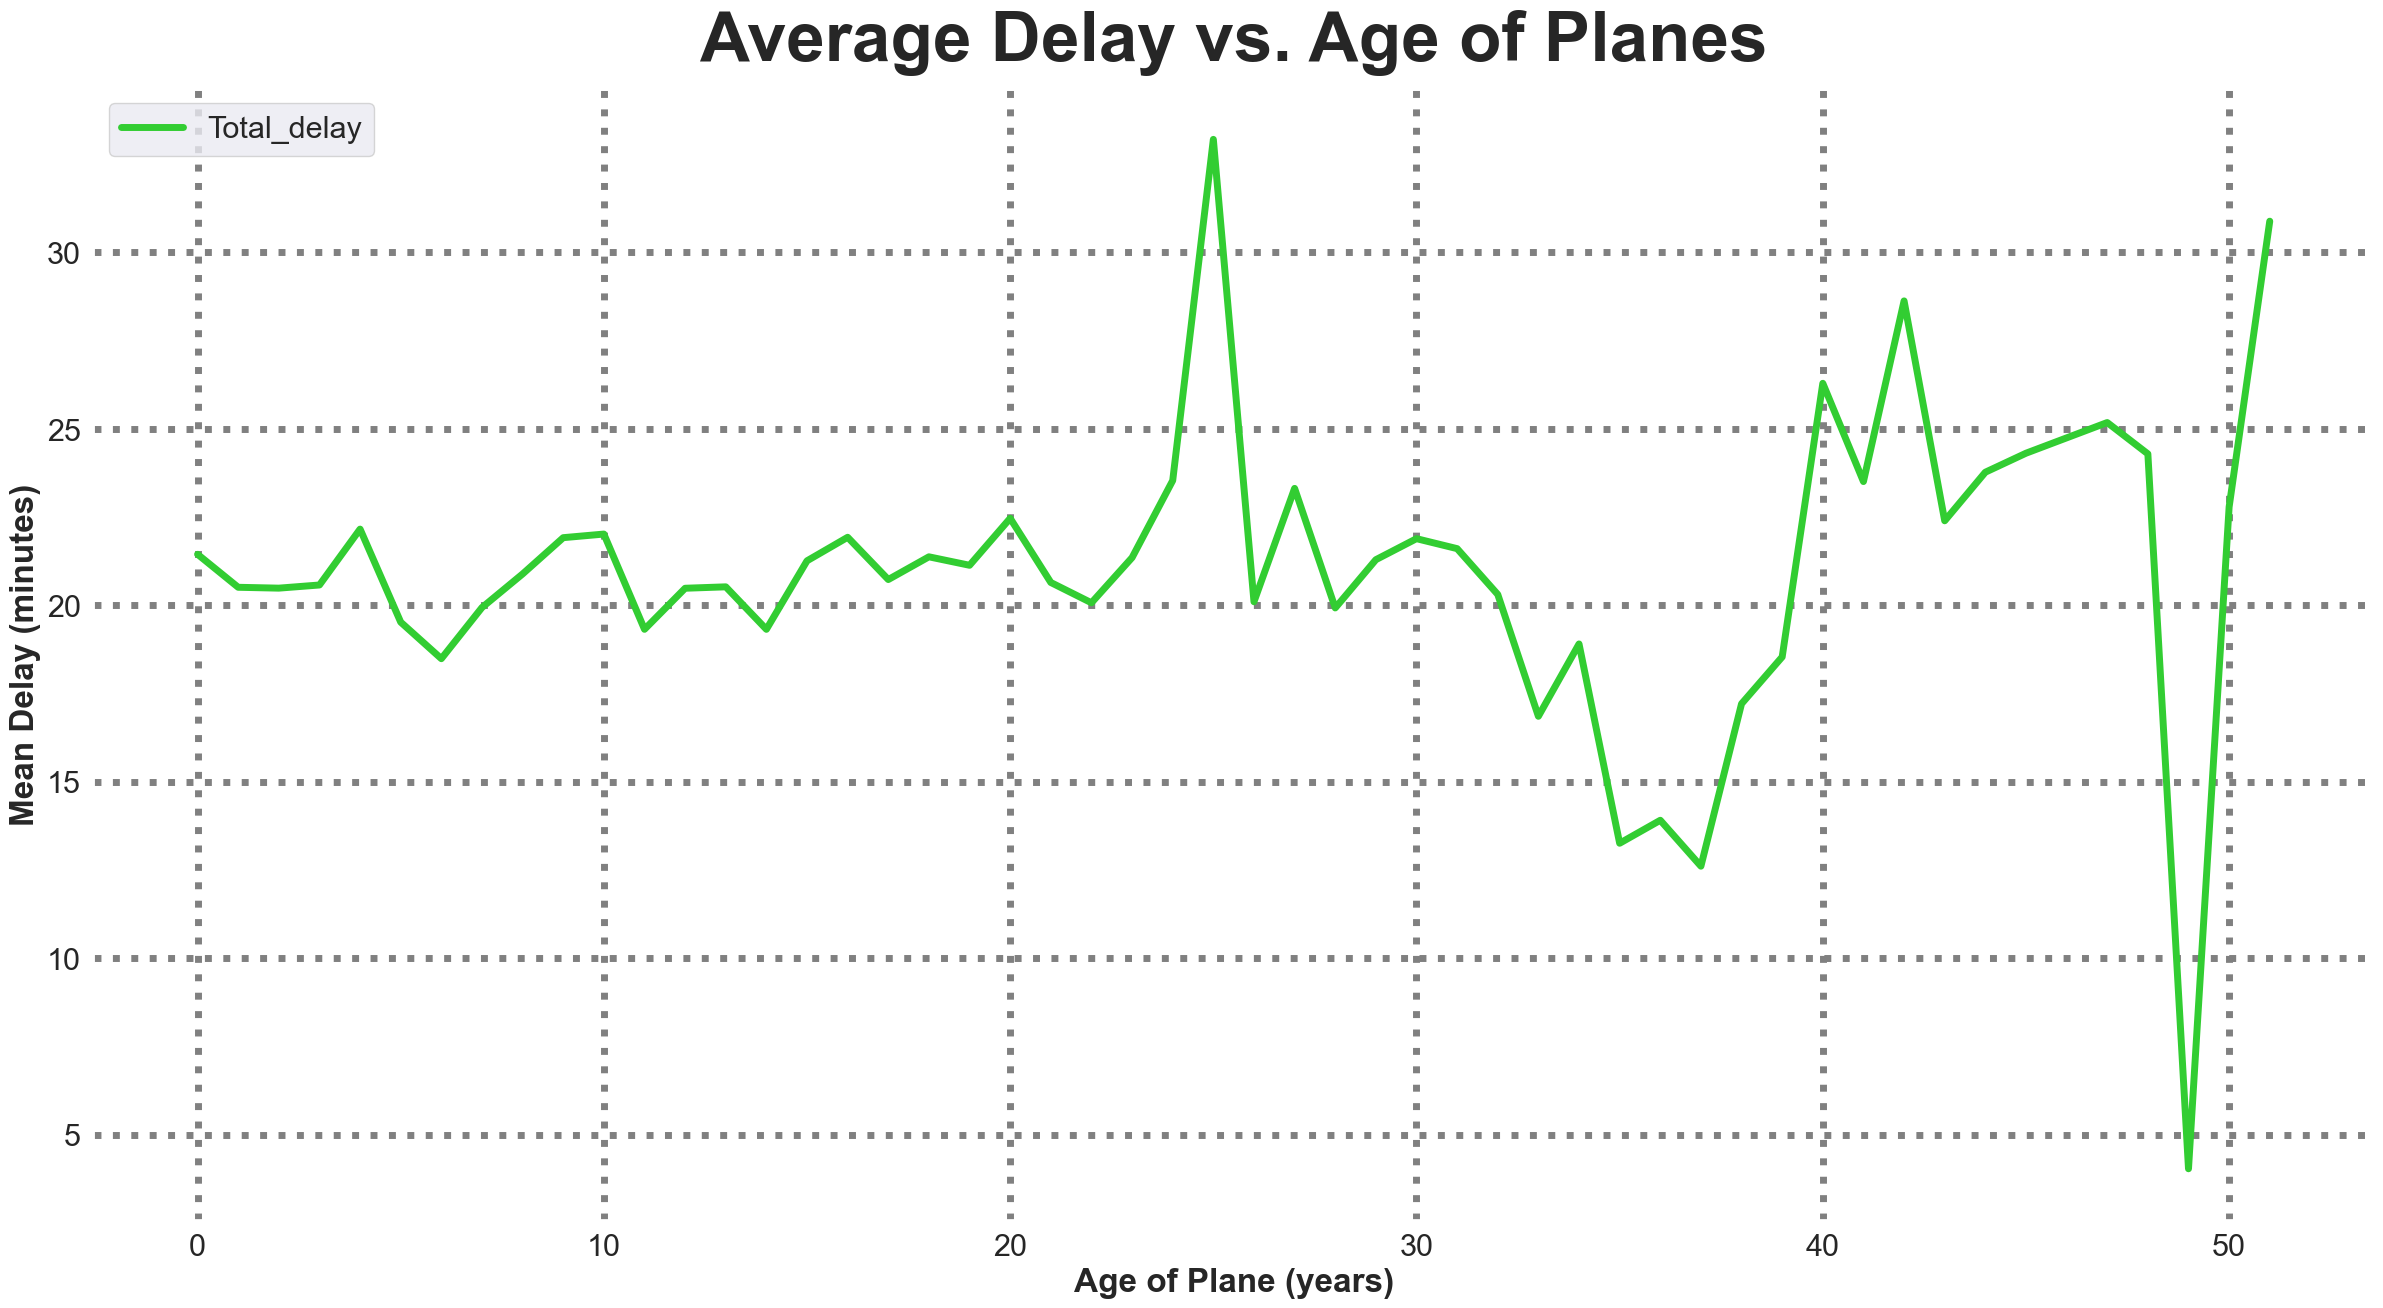

In [190]:
# plotting a line chart
plt.figure(figsize=(100, 50))
sns.set(font_scale = 2)

ax = plt.subplot(331)

# Line plots for ArrDelay, DepDelay, and TotDelay against Age of Planes
ax.plot(delays.index, delays['Total_delay'], linewidth=5, label='Total_delay', color='limegreen')

ax.set_xlabel('Age of Plane (years)', weight='bold')
ax.set_ylabel('Mean Delay (minutes)', weight='bold')
ax.set_facecolor('white')

ax.set_title('Average Delay vs. Age of Planes', fontsize=50, fontweight='bold', pad=20)

plt.grid(color='gray', linestyle='dotted', linewidth=5)
ax.legend(loc='upper left')
plt.show()